Question2

2.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
import networkx as nx

In [2]:
edges = []
edgedic = {}
for idx in range(1,10):
    edges.append(np.genfromtxt("q2/network"+str(idx)+".txt", delimiter='\t',dtype=int))
    for pair in edges[idx - 1]:
        if (pair[0],pair[1]) not in edgedic.keys():
            edgedic[pair[0],pair[1]] = 1
        else:
            edgedic[pair[0],pair[1]] += 1

In [3]:
def G(edgedic,p):
    G = []
    eigenvalue = []
    for key,value in edgedic.items():
        if value >= p:
            G.append((key[0],key[1]))
    Undirected_Graph = nx.Graph(G)
    AM = nx.adjacency_matrix(Undirected_Graph)
    AM = AM.asfptype()
    lmda = max(eigs(AM,which="LM")[0])
    return lmda

C:\Users\Zun Wang\AppData\Local\Temp\ipykernel_13976\926533975.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  AM = nx.adjacency_matrix(Undirected_Graph)
C:\Users\Zun Wang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


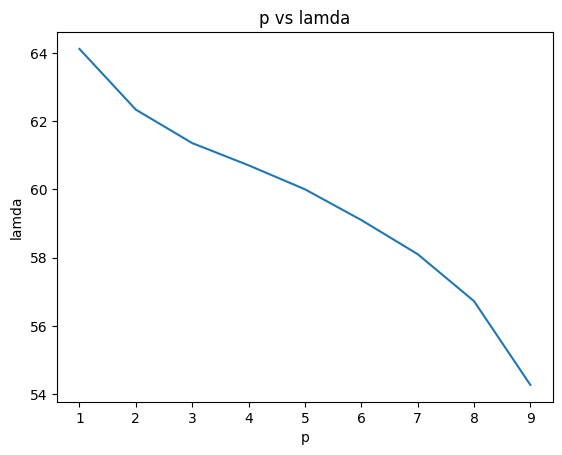

In [4]:
lamda = []
p = [1,2,3,4,5,6,7,8,9]
for idx in range(1,10):
    lamda.append(G(edgedic,idx))
plt.plot(p,lamda)
plt.title("p vs lamda")
plt.xlabel("p")
plt.ylabel("lamda")
plt.savefig("q2/2.1.png")
plt.show()


2.2

In [5]:
import EoN

In [6]:
def G_(edgedic,p):
    G = []
    eigenvalue = []
    for key,value in edgedic.items():
        if value >= p:
            G.append((key[0],key[1]))
    return G

In [7]:
G1 = G_(edgedic,1)
G1 = nx.Graph(G1)
beta = 0.01
gamma = 0.08

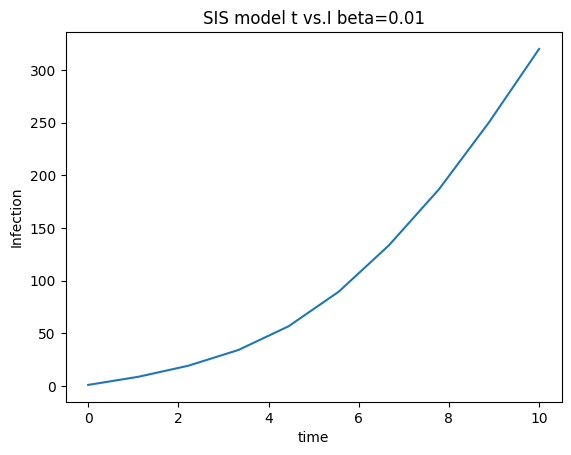

In [8]:
times = np.linspace(0,10,10)
allS = np.zeros(len(times))
allI = np.zeros(len(times))
for repeat in range(50):
    t,S,I = EoN.fast_SIS(G1, tau=beta, gamma=gamma, tmax = 10, initial_infecteds = [1])
    tempS,tempI = EoN.subsample(times,t,S,I)
    allS += tempS
    allI += tempI
averageS = allS / 50
averageI = allI / 50
plt.plot(times,averageI)
plt.title("SIS model t vs.I beta=0.01")
plt.xlabel("time")
plt.ylabel("Infection")
plt.savefig("q2/2.2.1.png")

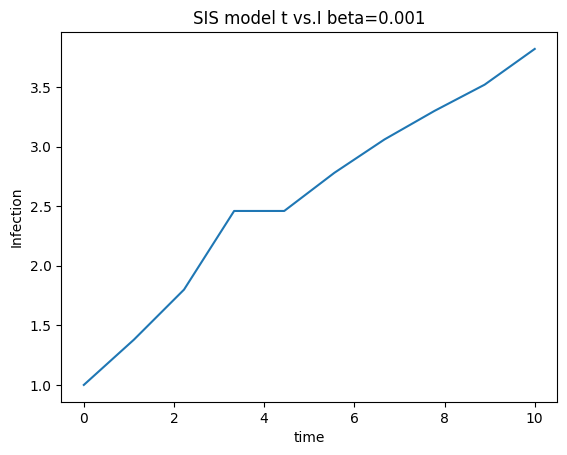

In [9]:
beta = 0.001
times = np.linspace(0,10,10)
allS = np.zeros(len(times))
allI = np.zeros(len(times))
for repeat in range(50):
    t,S,I = EoN.fast_SIS(G1, tau=beta, gamma=gamma, tmax = 10, initial_infecteds = [1])
    tempS,tempI = EoN.subsample(times,t,S,I)
    allS += tempS
    allI += tempI
averageS = allS / 50
averageI = allI / 50
plt.plot(times,averageI)
plt.title("SIS model t vs.I beta=0.001")
plt.xlabel("time")
plt.ylabel("Infection")
plt.savefig("q2/2.2.2.png")

2.3

In [10]:
def eff_strength(G,beta,gamma):
    AM = nx.adjacency_matrix(G)
    AM = AM.asfptype()
    lamda = max(eigs(AM,which="LM")[0])
    eff_strength = lamda * (beta/gamma)
    return eff_strength

C:\Users\Zun Wang\AppData\Local\Temp\ipykernel_13976\3819193689.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  AM = nx.adjacency_matrix(G)
C:\Users\Zun Wang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


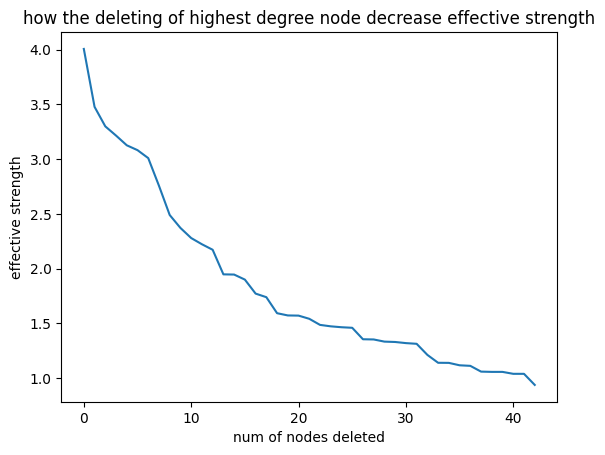

In [11]:
G1 = G_(edgedic,1)
G1 = nx.Graph(G1)
beta = 0.01
gamma = 0.16
#effective strength = lamda * (beta/gamma)
eff_s = eff_strength(G1,beta,gamma)
eff_s_lst = [eff_s]
count = 0
while eff_s > 1:
    degrees = []
    nodes = []
    for node,val in G1.degree():
        nodes.append(node)
        degrees.append(val)
    index = degrees.index(max(degrees))
    if not isinstance(index, int):
        index = index[-1]
    G1.remove_node(nodes[index])
    eff_s = eff_strength(G1,beta,gamma)
    count += 1
    eff_s_lst.append(eff_s)
count_lst = list(range(count+1))
plt.plot(count_lst,eff_s_lst)
plt.xlabel("num of nodes deleted")
plt.ylabel("effective strength")
plt.title("how the deleting of highest degree node decrease effective strength")
plt.savefig("q2/2.3.png")

2.4

In [12]:
G1 = G_(edgedic,1)
G1 = nx.Graph(G1)
beta = 0.01
gamma = 0.16
#effective strength = lamda * (beta/gamma)
eff_s = eff_strength(G1,beta,gamma)
eff_s_lst = [eff_s]
count = 0
while eff_s > 1:
    degrees = []
    nodes = []
    for node,val in G1.degree():
        nodes.append(node)
        degrees.append(val)
    index = degrees.index(max(degrees))
    if not isinstance(index, int):
        index = index[-1]
    G1.remove_node(nodes[index])
    eff_s = eff_strength(G1,beta,gamma)
    count += 1
    if count == 42:
        G42 = G1
    elif count == 41:
        G41 = G1
    elif count == 40:
        G40 = G1
    eff_s_lst.append(eff_s)

C:\Users\Zun Wang\AppData\Local\Temp\ipykernel_13976\3819193689.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  AM = nx.adjacency_matrix(G)


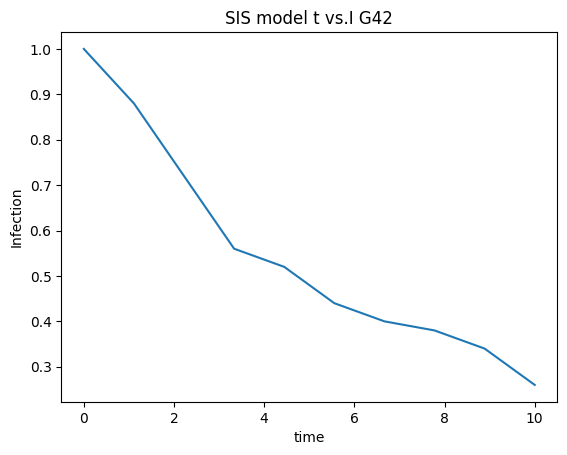

In [13]:
times = np.linspace(0,10,10)
allS = np.zeros(len(times))
allI = np.zeros(len(times))
for repeat in range(50):
    t,S,I = EoN.fast_SIS(G42, tau=beta, gamma=gamma, tmax = 10,initial_infecteds = list(G42.nodes)[0])
    tempS,tempI = EoN.subsample(times,t,S,I)
    allS += tempS
    allI += tempI
averageS = allS / 50
averageI = allI / 50
plt.plot(times,averageI)
plt.title("SIS model t vs.I G42")
plt.xlabel("time")
plt.ylabel("Infection")
plt.savefig("q2/2.4.1.png")

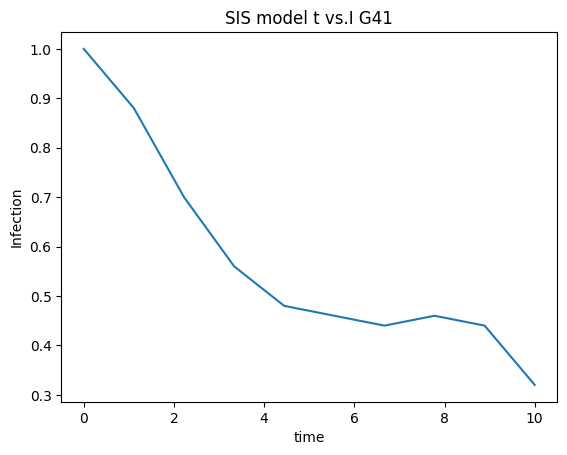

In [14]:
times = np.linspace(0,10,10)
allS = np.zeros(len(times))
allI = np.zeros(len(times))
for repeat in range(50):
    t,S,I = EoN.fast_SIS(G41, tau=beta, gamma=gamma, tmax = 10,initial_infecteds = list(G41.nodes)[0])
    tempS,tempI = EoN.subsample(times,t,S,I)
    allS += tempS
    allI += tempI
averageS = allS / 50
averageI = allI / 50
plt.plot(times,averageI)
plt.title("SIS model t vs.I G41")
plt.xlabel("time")
plt.ylabel("Infection")
plt.savefig("q2/2.4.2.png")

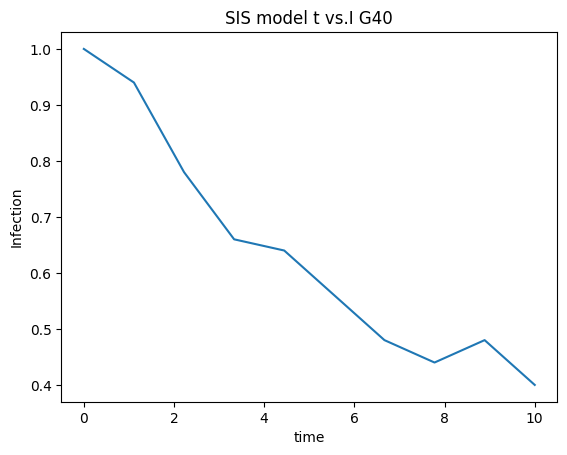

In [15]:
times = np.linspace(0,10,10)
allS = np.zeros(len(times))
allI = np.zeros(len(times))
for repeat in range(50):
    t,S,I = EoN.fast_SIS(G40, tau=beta, gamma=gamma, tmax = 10,initial_infecteds = list(G40.nodes)[0])
    tempS,tempI = EoN.subsample(times,t,S,I)
    allS += tempS
    allI += tempI
averageS = allS / 50
averageI = allI / 50
plt.plot(times,averageI)
plt.title("SIS model t vs.I G40")
plt.xlabel("time")
plt.ylabel("Infection")
plt.savefig("q2/2.4.3.png")